![alt text](q1.PNG "Q1")

In [74]:
from math import sqrt

p = 0.56
alpha = 0.05
n = 2000

#Check if number of successes & failures both > 5
print('np > 5: ' + str(n*p>5))
print('n(1-p) > 5: ' + str(n*(1-p)>5))

z = 1.96
std_error = sqrt((p*(1-p)) / n)

#calculate confidence interval: p +/- z*std_error
mrg_of_error = z*std_error
lower = p - mrg_of_error
upper = p + mrg_of_error

print('\n')
print('a.) 95% confidence interval for population proportion: ' + str(round(lower,3)) + ' <= pi <= ' + str(round(upper,3)))
print('b.) This means that if repeated samples are taken, the population proportion pi will fall within the ' \
     + 'constructed confidence interval in 95% of those samples. There is 95% confidence that the confidence ' \
     + 'interval constructed using the sample proportion 56% contains the true population proportion')
print('c.) Margin of Error: ' + str(round(mrg_of_error,3)))

np > 5: True
n(1-p) > 5: True


a.) 95% confidence interval for population proportion: 0.538 <= pi <= 0.582
b.) This means that if repeated samples are taken, the population proportion pi will fall within the constructed confidence interval in 95% of those samples. There is 95% confidence that the confidence interval constructed using the sample proportion 56% contains the true population proportion
c.) Margin of Error: 0.022


In [71]:
#PART D
z = 1.96
e = .02

n = (z**2)*(0.5*0.5) / (.02**2)
print('The required sample size to construct a 95% C.I. for pi with margin of error 2% is ' + str(round(n)))

z = 2.58
n = (z**2)*(0.5*0.5) / (.02**2)
print('The required sample size to construct a 99% C.I. for pi with margin of error 2% is ' + str(round(n)))

The required sample size to construct a 95% C.I. for pi with margin of error 2% is 2401
The required sample size to construct a 99% C.I. for pi with margin of error 2% is 4160


![alt text](q2.PNG "Q2")

In [20]:
import scipy.stats as st
# PART A
# H0: u = 6.3
# H1: u < 6.3
u = 6.3
n = 100
sample_mean = 5.5
SD = 2.9

z = (sample_mean - u) / (SD / sqrt(n))
p_value = st.norm.cdf(z)
print('p-value: ' + str(round(p_value,4)))
print('Reject H0 and suggest H1')
print('It is likely that introducing flex-time actually reduced absenteeism, as the calculated' \
      + ' p-value indicates that the probability that the test statistic of 5.5 days being at least' \
      + ' that extreme is extremely low (only 0.29%), assuming the null hypothesis is true. Therefore,' \
      + ' the reduction in avg days off from work calculated is NOT due to random chance')

p-value: 0.0029
Reject H0 and suggest H1
It is likely that introducing flex-time actually reduced absenteeism, as the calculated p-value indicates that the probability that the test statistic of 5.5 days being at least that extreme is extremely low (only 0.29%), assuming the null hypothesis is true. Therefore, the reduction in avg days off from work calculated is NOT due to random chance


In [27]:
# PART B
# H0: u = 6.3
# H1: u < 6.3
u = 6.3
n = 100
sample_mean = 5.9
SD = 2.9

z = (sample_mean - u) / (SD / sqrt(n))
p_value = st.norm.cdf(z)
print('p-value: ' + str(round(p_value,4)))
print('Assuming alpha=0.05, Fail to reject H0, and Reject H1')
print('If the sample mean is 5.9 and hypothesis tests are carried out at a 5% significance level, then it is likely ' \
      + 'that the reduction in absenteeism relative to the population mean of 6.3 is due to random chance, and NOT the ' \
      + ' the introduction of flex-time. The calculated p-value of 0.0839 indicates that the probability that a test ' \
      + 'statistic at least as extreme as 5.9 occurs, assuming H0 is true, is about 8.39%. This is high enough to ' \
      + 'conclude that the reduction in absenteeism may be due to random chance, and not the introduction of flex-time')

p-value: 0.0839
Assuming alpha=0.05, Fail to reject H0, and Reject H1
If the sample mean is 5.9 and hypothesis tests are carried out at a 5% significance level, then it is likely that the reduction in absenteeism relative to the population mean of 6.3 is due to random chance, and NOT the  the introduction of flex-time. The calculated p-value of 0.0839 indicates that the probability that a test statistic at least as extreme as 5.9 occurs, assuming H0 is true, is about 8.39%. This is high enough to conclude that the reduction in absenteeism may be due to random chance, and not the introduction of flex-time


![alt text](q3.PNG "Q3")

In [48]:
import pandas as pd
df = pd.read_csv('Therm.csv', sep=',')
display(df.head()) #first 5 rows

,Name,Oral,Tympanic,difference
0,John,96.9,98.5,1.6
1,Andrew,98.0,98.4,0.4
2,Sally,100.5,101.5,1.0
3,Joanie,98.3,99.5,1.2
4,Kevin,97.7,98.0,0.3


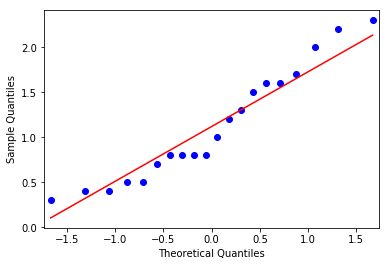

In [34]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from matplotlib import pyplot

qqplot(df.loc[:,'difference'], line='s')
pyplot.show()

In [54]:
from scipy import stats
from scipy.stats import shapiro

stat, p = shapiro(df.loc[:,'difference'])
print('Statistic=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Normal (fail to reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

Statistic=0.927, p=0.132
Sample looks Normal (fail to reject H0)


In [75]:
# H0: difference > 0
# H1: difference <= 0
u = 0
sample_mean = df.loc[:,'difference'].mean()
SD = df.loc[:,'difference'].std()
alpha = 0.01
t = (sample_mean - u) / (SD / sqrt(df.shape[0]))

deg_f = df.shape[0]-1
p_value = 2*(1-stats.t.cdf(z, deg_f))
print('Critical t value: ' + str(t))
print('p-value: ' + str(p_value))
print('alpha: ' + str(alpha))

if p_value > alpha:
    print('Fail to reject H0 at 0.01 significance level, Reject H1')
else:
    print('Reject H0 at 0.01 significance level, Suggest H1')

print('It cannot be assumed that the population mean temperature difference is greater than 0, given this sample')

Critical t value: 8.03024585457061
p-value: 0.06482897928896914
alpha: 0.01
Fail to reject H0 at 0.01 significance level, Reject H1
It cannot be assumed that the population mean temperature difference is greater than 0, given this sample


![alt text](q4.PNG "Q4")

FALSE. Degrees of freedom is calculated as n-1, so in this case a Student's t distribution with 4 degrees of freedom should be used.